# Building ai model

## Import required dependencies to the enviroment

In [1]:
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install numpy
!pip install wandb
!pip install kaggle
!pip install pycuda
!pip install cuda-python
!pip3 install torch
!pip install pydot
!pip install nvidia-cudnn
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


## Script

### Packages and setup

#### Setup of Tensorflow

In [164]:
import tensorflow
from tensorflow.data import AUTOTUNE

tensorflow.get_logger().setLevel('ERROR')


#### Setup of Keras

In [183]:
import keras
import keras.preprocessing
from keras import layers

from keras.utils \
    import \
    image_dataset_from_directory, \
    plot_model

#### Setup of math libraries

In [184]:
import matplotlib
from matplotlib import pyplot

In [185]:
import os
from random import SystemRandom

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [186]:
from IPython import display

In [187]:
random_generator = SystemRandom()

In [188]:
path_to_dataset = r'/mnt/c/Users/Kentv/Desktop/dataset'

image_width = 256
image_height = 256

image_channels = 3

image_size = (
    image_width,
    image_height
)

image_properties = (
    image_width,
    image_height,
    image_channels
)

In [105]:
m_initial_layer = 64

m_mid_section = m_initial_layer/2
m_end_section = m_initial_layer/4


In [132]:
batches = 15
epochs = 2
queue = 20

validation_split = 0.5

training_dataset_seed = random_generator.randint(
    0,
    500000
)

validation_dataset_seed = random_generator.randint(
    0,
    500000
)

backlog = []

In [71]:
find_model_at = 'model.tf'

In [72]:
input_layer = None
middle_layer = None
output_layer = None

In [133]:
print(
    'dataset seeds: ',
    str(training_dataset_seed),
    ', ',
    str(validation_dataset_seed)
)

dataset seeds:  292789 ,  356113


In [134]:
configuration_of_training = \
    {
        "seed": training_dataset_seed
    }

configuration_of_validation = \
    {
        "seed": validation_dataset_seed
    }

configuration_of_learning = \
    {
        "epochs": epochs,
        "size of batch": batches,
        "split at": validation_split
    }

configuration = \
    {
        "training": configuration_of_training,
        "validation": configuration_of_validation,
        "learning": configuration_of_learning
    }

print(
    'configuration: ',
    configuration
)

configuration:  {'training': {'seed': 292789}, 'validation': {'seed': 356113}, 'learning': {'epochs': 2, 'size of batch': 15, 'split at': 0.5}}


### Training & validation datasets

#### Setup of the datasets

In [135]:
training_dataset = image_dataset_from_directory(
    path_to_dataset,
    validation_split=validation_split,
    subset='training',
    seed=training_dataset_seed,
    image_size=image_size,
    batch_size= batches,
    crop_to_aspect_ratio=True
)

validation_dataset = image_dataset_from_directory(
    path_to_dataset,
    validation_split=validation_split,
    subset='validation',
    seed=validation_dataset_seed,
    image_size=image_size,
    batch_size= batches,
    crop_to_aspect_ratio=True
)

Found 2885 files belonging to 52 classes.
Using 1443 files for training.
Found 2885 files belonging to 52 classes.
Using 1442 files for validation.


#### Category names

In [136]:
training_labels = training_dataset.class_names
validation_labels = validation_dataset.class_names

print(
    'training labels: ',
    str(training_labels),
    '\r\n'
)

print(
    'validation labels: ',
    str(validation_labels)
)


training labels:  ['artifacts.blurried', 'artifacts.noise', 'artifacts.unidentifiable', 'letters.A', 'letters.B', 'letters.C', 'letters.D', 'letters.E', 'letters.F', 'letters.G', 'letters.H', 'letters.I', 'letters.J', 'letters.K', 'letters.L', 'letters.M', 'letters.N', 'letters.O', 'letters.P', 'letters.Q', 'letters.R', 'letters.S', 'letters.T', 'letters.U', 'letters.V', 'letters.W', 'letters.X', 'letters.Y', 'letters.Z', 'letters.Å', 'letters.Æ', 'letters.Ø', 'letters.ü', 'mathematics.minus', 'mathematics.plus', 'numbers.0', 'numbers.1', 'numbers.2', 'numbers.4', 'numbers.5', 'numbers.6', 'numbers.7', 'numbers.8', 'numbers.9', 'symbols.arrows', 'symbols.copyright', 'symbols.electricity', 'symbols.lines', 'symbols.parking', 'symbols.parking.handicap', 'symbols.trademark', 'symbols.turn.on.off'] 

validation labels:  ['artifacts.blurried', 'artifacts.noise', 'artifacts.unidentifiable', 'letters.A', 'letters.B', 'letters.C', 'letters.D', 'letters.E', 'letters.F', 'letters.G', 'letters.H'

#### Showing excerpts from the dataset

##### training dataset

2023-03-08 15:52:03.959695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1443]
	 [[{{node Placeholder/_0}}]]
2023-03-08 15:52:03.960309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1443]
	 [[{{node Placeholder/_4}}]]


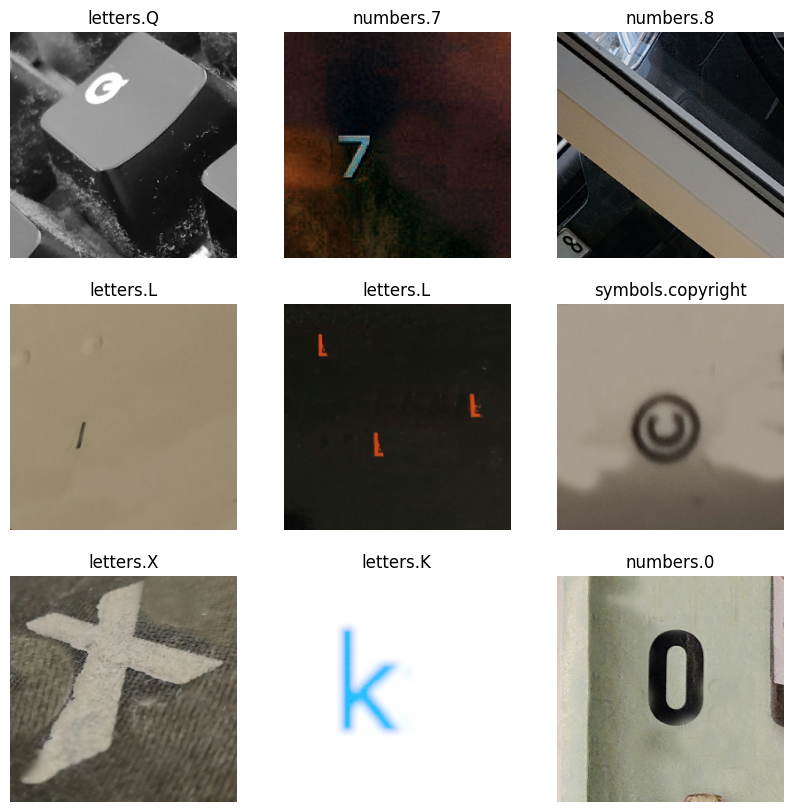

In [177]:
pyplot.figure(
    figsize=(
        10,
        10
    )
)

for images, labels in training_dataset.take(1):
    for i in range(9):
        ax = pyplot.subplot(3, 3, i + 1)
        pyplot.imshow(images[i].numpy().astype('uint8'))
        pyplot.title(training_labels[labels[i]])
        pyplot.axis('off')

##### validation dataset

2023-03-08 15:52:31.204277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1442]
	 [[{{node Placeholder/_0}}]]
2023-03-08 15:52:31.205045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1442]
	 [[{{node Placeholder/_0}}]]


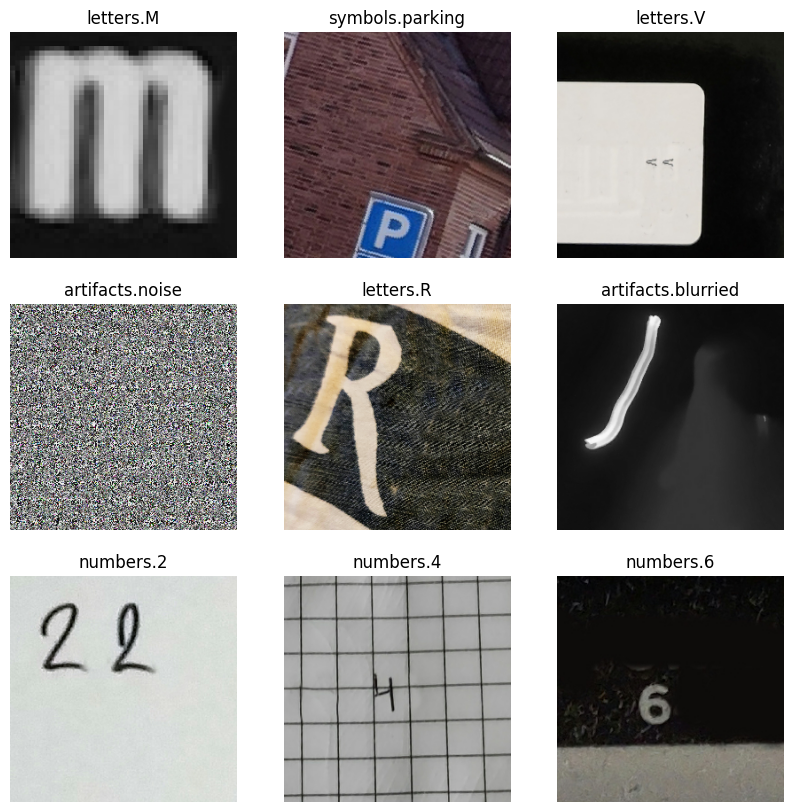

In [178]:
pyplot.figure(
    figsize=(
        10,
        10
    )
)

for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = pyplot.subplot(3, 3, i + 1)
        pyplot.imshow(images[i].numpy().astype('uint8'))
        pyplot.title(training_labels[labels[i]])
        pyplot.axis('off')

In [179]:
size_of_training_labels = len(training_labels)
size_of_validation_labels = len(validation_labels)

print(
    'size of training labels:',
    size_of_training_labels
)
print(
    'size of validation labels:',
    size_of_validation_labels
)

size of training labels: 52
size of validation labels: 52


#### Optimisations to the dataset

In [138]:
training_dataset = training_dataset.cache().prefetch(
    buffer_size=AUTOTUNE
)

validation_dataset = validation_dataset.cache().prefetch(
    buffer_size=AUTOTUNE
)

### Model

#### Input layer

In [139]:
if not(input_layer is None):
    del input_layer

input_layer = layers.Input(
    shape=image_properties
)

input_layer = layers.Rescaling(
    1./255
)(
    input_layer
)

input_layer = layers.Dropout(0.5)(
    input_layer
)


#### Middle layer

In [140]:
if not (middle_layer is None):
    del middle_layer

middle_layer = layers.BatchNormalization()(
    input_layer
)

middle_layer = layers.Conv2D(
    m_initial_layer,
    image_channels,
    padding='same',
    activation='relu'
)(
    middle_layer
)

middle_layer = layers.Conv2D(
    m_initial_layer,
    image_channels,
    padding='same',
    activation='sigmoid'
)(
    middle_layer
)

middle_layer = layers.MaxPooling2D()(
    middle_layer
)

middle_layer = layers.Dropout(
    0.5
)(middle_layer)

middle_layer = layers.Conv2D(
    m_mid_section,
    image_channels,
    padding='same',
    activation='sigmoid'
)(
    middle_layer
)

middle_layer = layers.MaxPooling2D()(
    middle_layer
)

decision_layer = layers.Conv2D(
    m_mid_section,
    image_channels,
    padding='same',
    activation='sigmoid'
)(
    middle_layer
)


middle_layer = layers.MaxPooling2D()(
    decision_layer
)

# end section
middle_layer = layers.Conv2D(
    m_end_section,
    image_channels,
    padding='same',
    activation='relu'
)(
    middle_layer
)

middle_layer = layers.MaxPooling2D()(
    middle_layer
)

#### Output layer

In [141]:
if not(output_layer is None):
    del output_layer

output_layer = layers.Flatten()(
    middle_layer
)

output_layer = layers.BatchNormalization()(
    output_layer
)

output_layer = layers.Dropout(
    0.5
)(output_layer)

output_layer = layers.Dense(
    256
)(
    output_layer
)

output_layer = layers.Dense(
    size_of_training_labels
)(
    output_layer
)

#### Creating the instance model

In [149]:
model = keras.Model(
    inputs=input_layer,
    outputs=output_layer
)

#### Compiling

In [150]:
model.compile(
    optimizer='adam',
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True
    ),
    metrics=[
        'accuracy'
    ]
)

#### Loading & Visualising the ai model

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_20 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 128, 128, 64)      0   

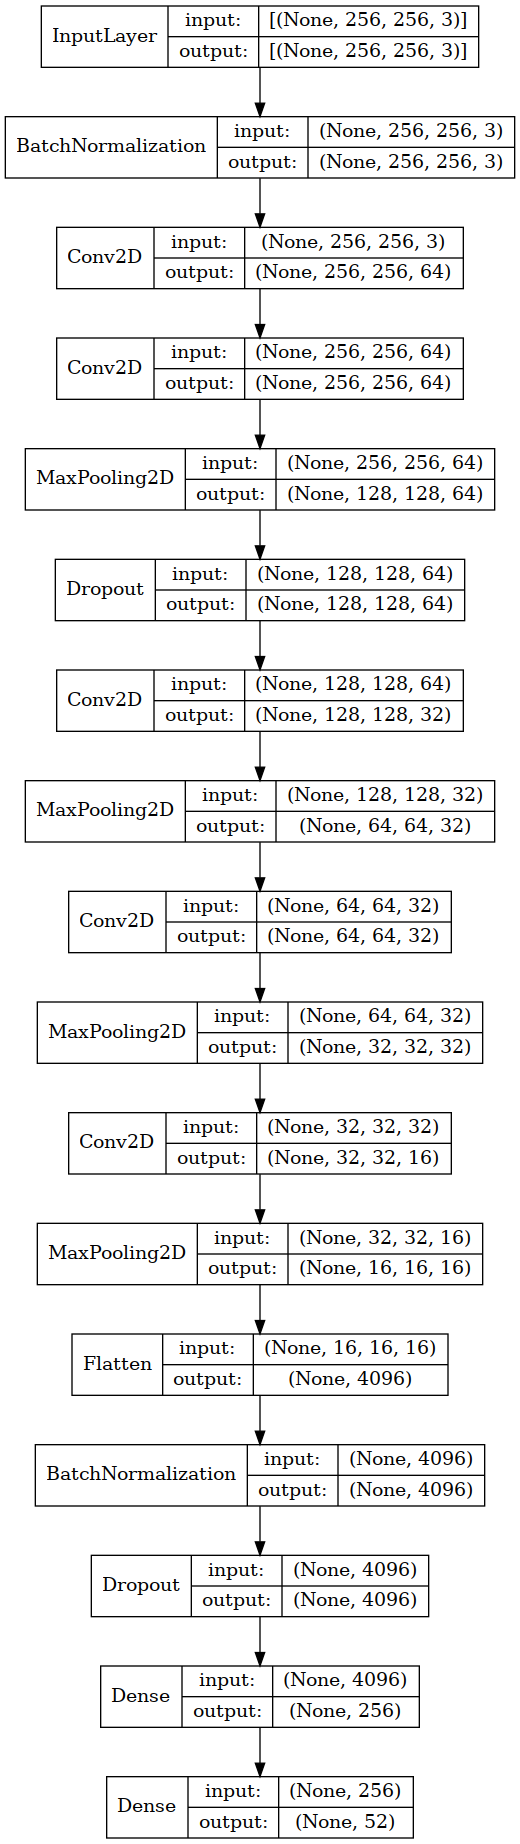

In [189]:
from os.path \
    import isdir

if isdir( find_model_at ):
    keras.models.load_model(find_model_at)

model.summary()

display(
    plot_model(
        model,
        show_shapes=True,
        show_layer_names=False
    )
)

### Training

In [190]:
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    batch_size=batches,
    use_multiprocessing=True,
    max_queue_size=queue,
    workers=7,
    shuffle=True
)

backlog.append(history.history)

Epoch 1/2
97/97 [==============================] - 371s 4s/step - loss: 3.4952 - accuracy: 0.1116 - val_loss: 176.6439 - val_accuracy: 0.0208
Epoch 2/2
97/97 [==============================] - 365s 4s/step - loss: 3.4057 - accuracy: 0.1317 - val_loss: 343.1380 - val_accuracy: 0.0014


#### Logging of the models output

In [191]:

print('result:' )
print(
    '---- accuracy: ',
    history.history['accuracy']
)

print(
    '---- loss: ',
    history.history['loss']
)

print(
    'value:'
)

print(
    '---- accuracy: ',
    history.history['val_accuracy']
)

print(
    '---- loss: ',
    history.history['val_loss']
)

result:
---- accuracy:  [0.11157311499118805, 0.13167013227939606]
---- loss:  [3.49522066116333, 3.405707836151123]
value:
---- accuracy:  [0.02080443874001503, 0.0013869625981897116]
---- loss:  [176.64389038085938, 343.13800048828125]


#### Evaluation of model

In [192]:
evaluation = model.evaluate(validation_dataset)
print(evaluation)

97/97 [==============================] - 57s 588ms/step - loss: 343.1380 - accuracy: 0.0014
[343.13800048828125, 0.0013869625981897116]


In [193]:
for log in backlog:
    print(log)

{'loss': [3.6724178791046143, 3.573413848876953], 'accuracy': [0.07692307978868484, 0.08662508428096771], 'val_loss': [37.07649230957031, 108.28269958496094], 'val_accuracy': [0.02080443874001503, 0.02080443874001503]}
{'loss': [3.49522066116333, 3.405707836151123], 'accuracy': [0.11157311499118805, 0.13167013227939606], 'val_loss': [176.64389038085938, 343.13800048828125], 'val_accuracy': [0.02080443874001503, 0.0013869625981897116]}


In [194]:
model.save(
    find_model_at,
    overwrite=True,
    include_optimizer=False,
    save_format='tf',
    save_traces=False
)